In [1]:
from glob import glob
from os.path import join as pjoin

import gym
import textworld.gym
from textworld import EnvInfos

GAMES_PATH = "/Users/martin/Documents/University/MLP/long-short-term-memes/tw_games"  # This assumes `sample_games.zip` was first unzipped.
gamefiles = glob(pjoin(GAMES_PATH, "*.ulx"))
print("Found {} games.".format(len(gamefiles)))


Found 11 games.


## Playing a game 

In [2]:
import sys

# sys.path.insert(0,'/Users/martin/Documents/University/MLP/long-short-term-memes/baselines/sample_submission_random')
sys.path.insert(0,'/Users/martin/Documents/University/MLP/long-short-term-memes/baselines/sample_submission_lstm-dqn')
# print(sys.path)
# from custom_agent import CustomAgent
from importlib import reload
import custom_agent
reload(custom_agent)
from custom_agent import CustomAgent
from pprint import pprint
gamefile = gamefiles[0]  # Pick a game.

requested_infos = EnvInfos(verbs=True, entities=True, description=True, inventory=True,admissible_commands=True, extras=["recipe", "walkthrough", "admissible_commands"])
# env_id = textworld.gym.register_games([gamefile], requested_infos)

agent = CustomAgent()

# print(dir(agent))
agent.load_pretrained_model("saved_models/2019_02_20_leon_initial_experiment_episode_15.pt")
# agent = textworld.agents.HumanAgent()

# env = gym.make(env_id)

# print(obs, infos)
# ob = [ob]


env_id = textworld.gym.register_games([gamefile], requested_infos,
                                      max_episode_steps=agent.max_nb_steps_per_episode,
                                      name="training")
env_id = textworld.gym.make_batch(env_id, batch_size=1, parallel=True)
env = gym.make(env_id)

ob, infos = env.reset()

# Since we asked for more infos, let's print them.
# print("Walkthrough:", ". ".join(infos["extra.walkthrough"]))
# print(infos["extra.recipe"])

# infos["extra.admissible_commands"] = infos["admissible_commands"]

env.render()  # Print the initial observation.
# pprint(infos)
score = [0]
done = [False]

while not all(done):
#     command = input('> ')
    act = agent.act(ob, score, done, infos)
#     print(act)
    ob, score, done, infos = env.step(act)
#     print(done)
#     ob, score, done, infos = env.step(command)
    env.render()
    

loading model from saved_models/2019_02_20_leon_initial_experiment_episode_15.pt

loading model from saved_models/2019_02_20_leon_initial_experiment_episode_15.pt



/Users/martin/miniconda3/envs/textworld/lib/python3.7/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)





                    ________  ________  __    __  ________
                   |        \|        \|  \  |  \|        \
                    \$$$$$$$$| $$$$$$$$| $$  | $$ \$$$$$$$$
                      | $$   | $$__     \$$\/  $$   | $$
                      | $$   | $$  \     >$$  $$    | $$
                      | $$   | $$$$$    /  $$$$\    | $$
                      | $$   | $$_____ |  $$ \$$\   | $$
                      | $$   | $$     \| $$  | $$   | $$
                       \$$    \$$$$$$$$ \$$   \$$    \$$
              __       __   ______   _______   __        _______
             |  \  _  |  \ /      \ |       \ |  \      |       \
             | $$ / \ | $$|  $$$$$$\| $$$$$$$\| $$      | $$$$$$$\
             | $$/  $\| $$| $$  | $$| $$__| $$| $$      | $$  | $$
             | $$  $$$\ $$| $$  | $$| $$    $$| $$      | $$  | $$
             | $$ $$\$$\$$| $$  | $$| $$$$$$$\| $$      | $$  | $$
             | $$$$  \$$$$| $$__/ $$| $$  | $$| $$_____ | $$__/ $$
          

> drop purple carrot
I only understood you as far as wanting to drop the purple potato.

> cook purple south with hot oven
I didn't understand that sentence.



## Visualizing a `TextWorld.Game` object

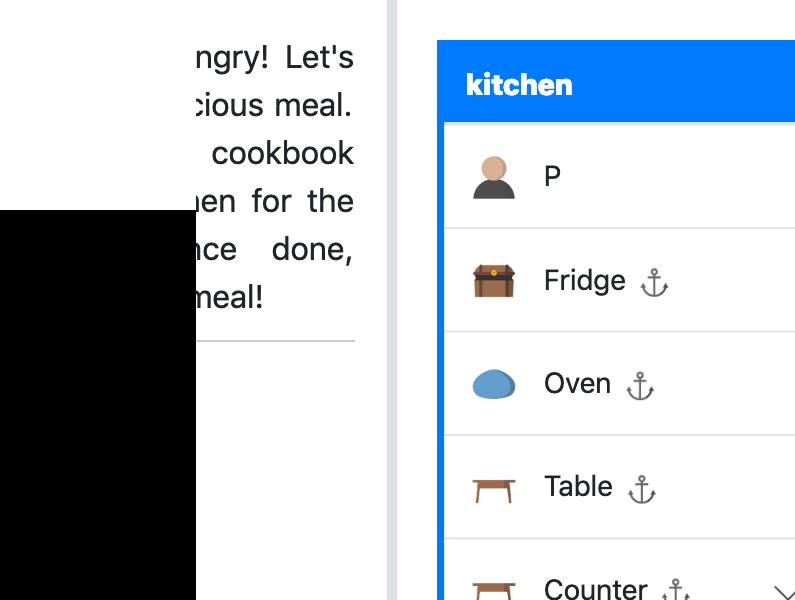

In [3]:
import textworld
gamefile = gamefiles[0]  # Pick a game.
game = textworld.Game.load(gamefile.replace(".ulx", ".json"))
textworld.render.visualize(game)

In [4]:
a = " "
b = a.strip().split()
print(b[-1])

IndexError: list index out of range